<h2> Assignment Part-I

<center>
<h1> Linear Regression Case Study - Geely Auto
</center>

**Business problem definition** - 
    
    A Chinese automobile company Geely Auto aspires to enter the US market 
    by setting up their manufacturing unit. The company wants to know -  
    Which variables are significant in predicting the price of a car 
    and how well those variables describe the price of a car.
    
    It will be used by the management to understand how exactly the prices vary with the independent variables. 
    They can accordingly manipulate the design of the cars, the business strategy etc. 
    to meet certain price levels. 
    Further, the model will be a good way for the management to understand the pricing dynamics of a new market.  


## Importing Libraries & dataset(s):-

In [670]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

Populating the interactive namespace from numpy and matplotlib


C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [671]:
#importing dataframe
car_price = pd.read_csv('carprice.csv')

## Working with the data -

  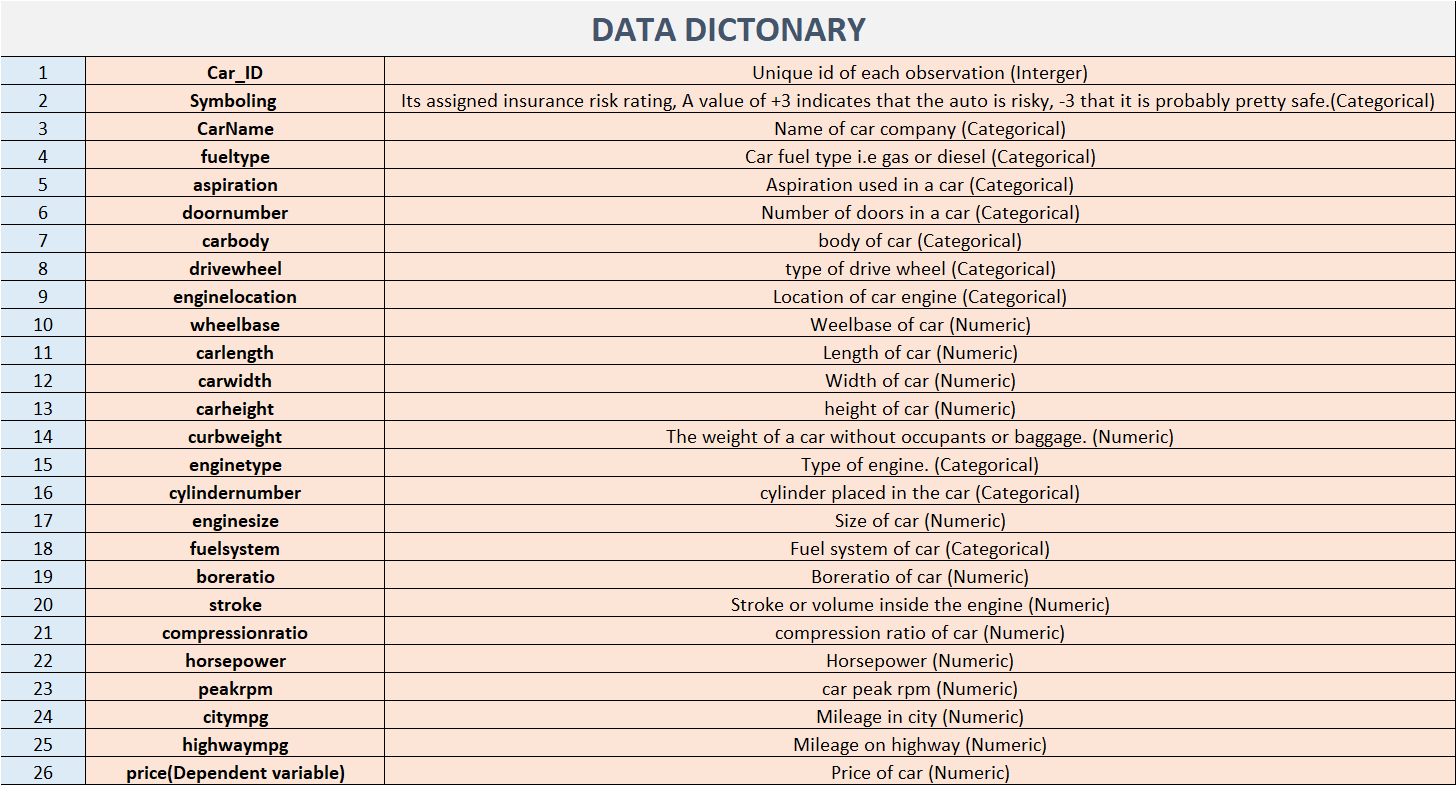

In [672]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [673]:
# checking for missing values in each column - seems to be NONE
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

    Dropping Car_ID since it is an unique identifier to the cars and does not bear any significance

In [674]:
car_price.drop('car_ID', axis=1, inplace=True)

    By Requirement -
    There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' 
    and the second is the 'car model'. Considering only company name as the independent variable for model building. 

In [675]:
car_price['CarName'] = car_price['CarName'].apply(lambda x: (x.split(" ")[0]))

In [676]:
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [677]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [678]:
#Dividing data into numeric and categoric list
num_list = ['wheelbase',
'carlength',
'carwidth',
'carheight',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'horsepower',
'peakrpm',
'citympg',
'highwaympg',
'price'
]
cat_list = ['symboling',
'CarName',
'fueltype',
'aspiration',
'doornumber',
'carbody',
'drivewheel',
'enginelocation',
'enginetype',
'cylindernumber',
'fuelsystem'
]

In [679]:
car_price_num = car_price[num_list]

###  1. Working with numeric variables

A> Outliers treatments-
    
    Outliers can be seen in the some of numeric attributes. Making necessary cut off to avoid outlier influence.

In [680]:
car_price_num.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]).T

,count,mean,std,min,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,max
wheelbase,205.0,98.756585,6.021776,86.60,93.02,93.700,94.50,95.30,95.96,97.00,98.40,100.40,103.50,107.900,110.00,120.90
carlength,205.0,174.049268,12.337289,141.10,157.14,157.300,165.30,168.72,171.50,173.20,175.60,177.80,186.62,188.800,196.36,208.10
carwidth,205.0,65.907805,2.145204,60.30,63.60,63.800,63.90,64.40,65.20,65.50,66.30,66.50,67.30,68.640,70.46,72.30
carheight,205.0,53.724878,2.443522,47.80,49.70,50.600,51.40,52.42,53.00,54.10,54.50,55.10,55.70,56.620,57.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,1901.00,1947.000,2048.00,2242.80,2333.40,2414.00,2579.00,2816.60,3045.80,3230.000,3503.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,90.00,91.000,97.00,98.00,109.00,120.00,122.00,136.00,152.00,181.000,201.20,326.00
boreratio,205.0,3.329756,0.270844,2.54,2.97,2.970,3.05,3.15,3.19,3.31,3.43,3.54,3.62,3.672,3.78,3.94
stroke,205.0,3.255415,0.313597,2.07,2.64,2.882,3.07,3.15,3.23,3.29,3.39,3.40,3.46,3.540,3.64,4.17
compressionratio,205.0,10.142537,3.972040,7.00,7.50,8.000,8.50,8.70,9.00,9.00,9.24,9.40,9.50,10.940,21.82,23.00
horsepower,205.0,104.117073,39.544167,48.00,62.00,68.000,69.00,76.00,87.20,95.00,102.00,114.00,134.20,160.000,180.80,288.00


    Plotting Numeric variables to understand the shape of data

highwaympg - With 50% data residing at 30; we see some outliers as high as > 50

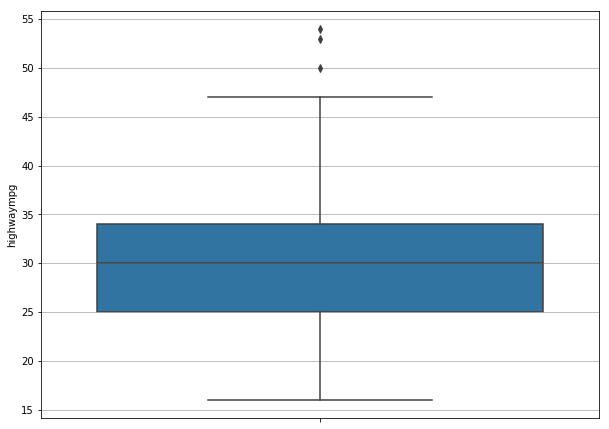

In [681]:
sns.boxplot(y='highwaympg', data = car_price_num)

citympg - With 50% data residing at 24; we see some max value as high as 49

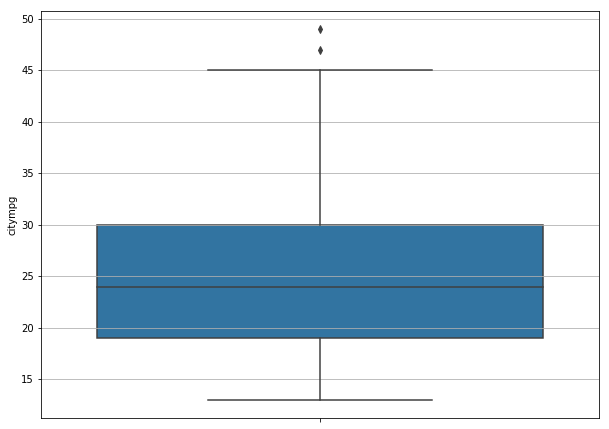

In [682]:
sns.boxplot(y='citympg', data = car_price_num)

horsepower - With 50% data residing at 95; we see some outliers as high as >250

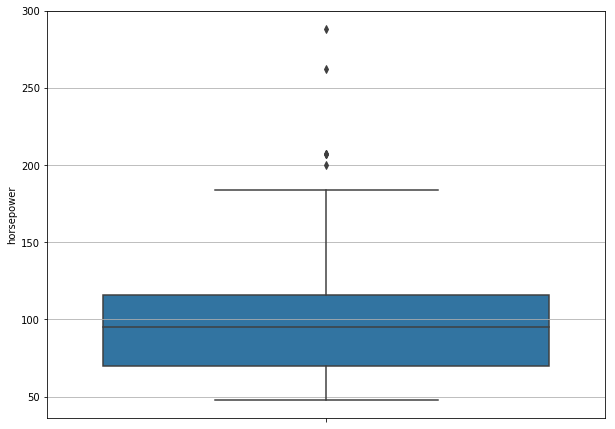

In [683]:
sns.boxplot(y='horsepower', data = car_price_num)

compressionratio - though median lies at 9; we see a large chunk of data at > 20 (10% of the observations)

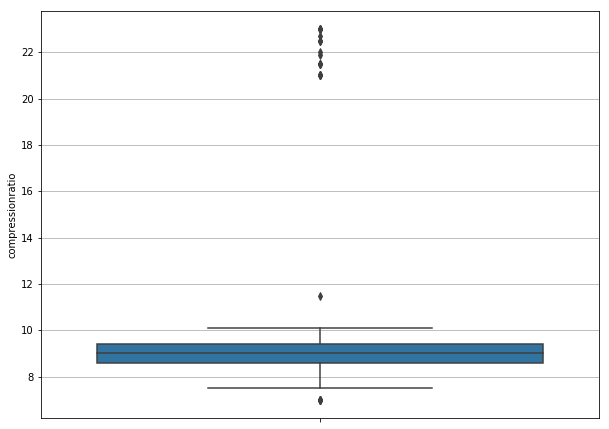

In [684]:
sns.boxplot(y='compressionratio', data = car_price_num)

In [685]:
#Handling Outliers - for "compressionratio"; making upper cut off as 90%
car_price_num['compressionratio']= car_price_num['compressionratio'].clip_upper(car_price_num['compressionratio'].quantile(0.90)) 

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


enginesize - median lying at 120; but the max values goes upto 326

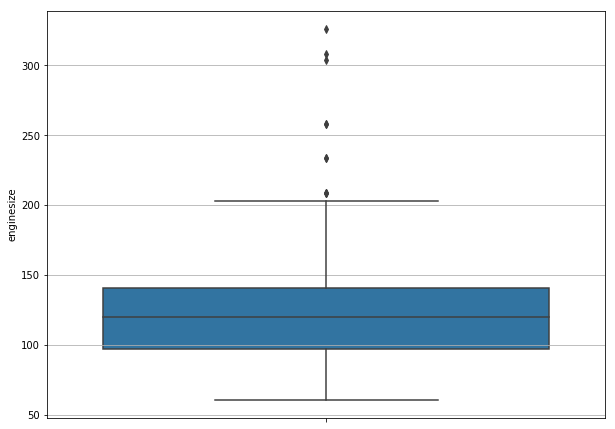

In [686]:
sns.boxplot(y='enginesize', data = car_price_num)

In [687]:
#Handling Outliers - 
#for 'wheelbase','carlength', 'curbweight', 'enginesize','horsepower','peakrpm','citympg' and 'highwaympg'
#95% - Upper cut off and 5% as as lower cut off
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

In [688]:
out_num = ['wheelbase','carlength', 'curbweight', 'enginesize','horsepower','peakrpm','citympg','highwaympg']

In [689]:
car_price_num[out_num]=car_price_num[out_num].apply(lambda x: outlier_capping(x))

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


B> Visualizing Data -
    
    Understanding relationship between the numric X variables with our Y (price)

**Observations:-** 

    'wheelbase', 'carlength', 'carwidth' is having linear positive relation with price

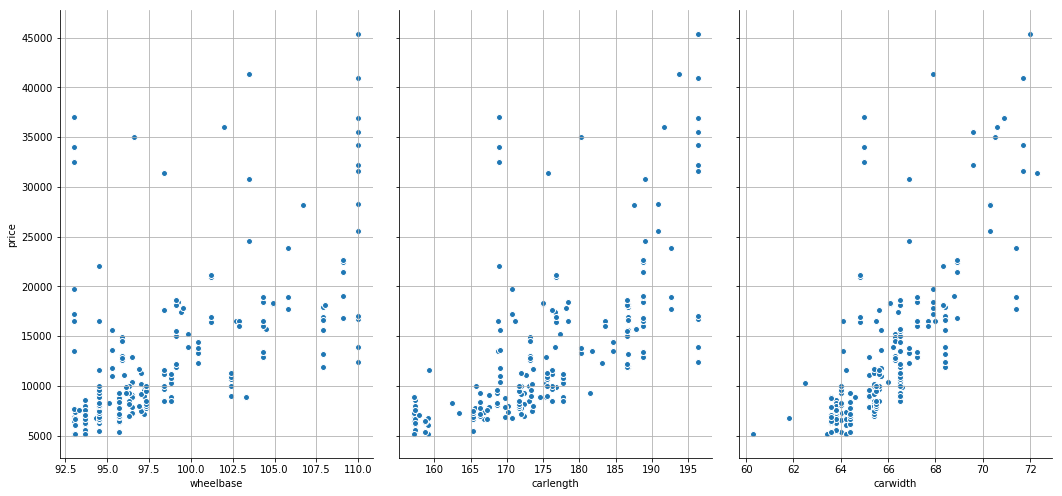

In [690]:
# Visualise the relationship between the X features and the response using scatterplots
sns.pairplot(car_price_num, x_vars=['wheelbase', 'carlength', 'carwidth'], y_vars='price',size=7, aspect=0.7, kind='scatter')

**Observations:-** 

    'curbweight','enginesize' is having linear positive relation with price; 
    however 'carheight' is scattered with faint linear relation with price.

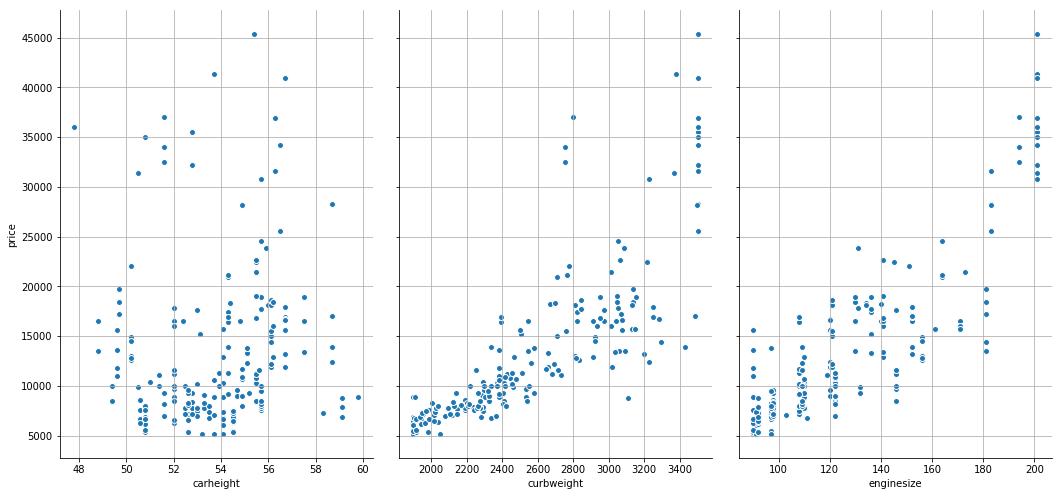

In [691]:
# Visualise the relationship between the X features and the response using scatterplots
sns.pairplot(car_price_num, x_vars=['carheight','curbweight','enginesize'], y_vars='price',size=7, aspect=0.7, kind='scatter')

**Observations:-** 

    'boreratio' is having linear positive relation with price; 
    however there is no linear relationship with 'stroke' and 'compressionratio'

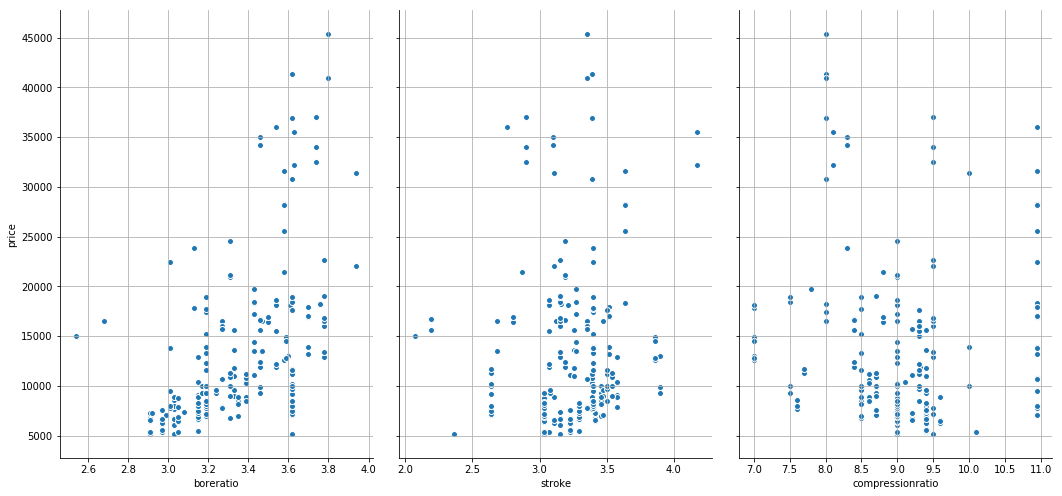

In [692]:
# Visualise the relationship between the X features and the response using scatterplots
sns.pairplot(car_price_num, x_vars=['boreratio','stroke','compressionratio'], y_vars='price',size=7, aspect=0.7, kind='scatter')

**Observations:-** 

    'horsepower' is having linear positive relation with price; however it is not so for 'peakrpm'

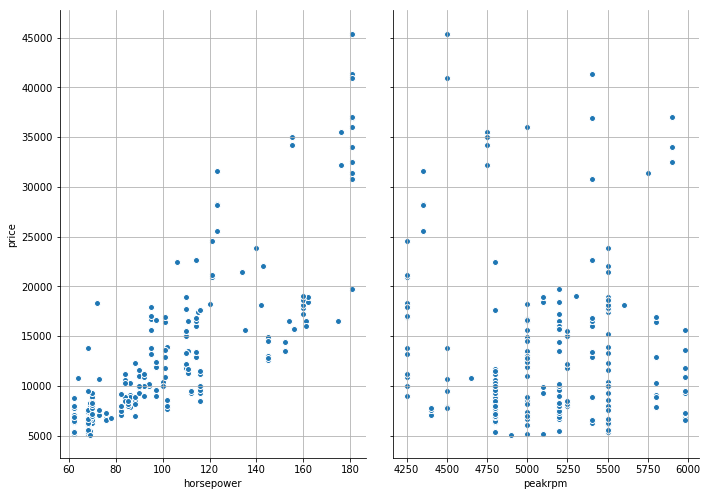

In [693]:
# Visualise the relationship between the X features and the response using scatterplots
sns.pairplot(car_price_num, x_vars=['horsepower','peakrpm'], y_vars='price',size=7, aspect=0.7, kind='scatter')

**Observations:-** 'citympg' and 'highwaympg' is showing linear negetive corelation with price.

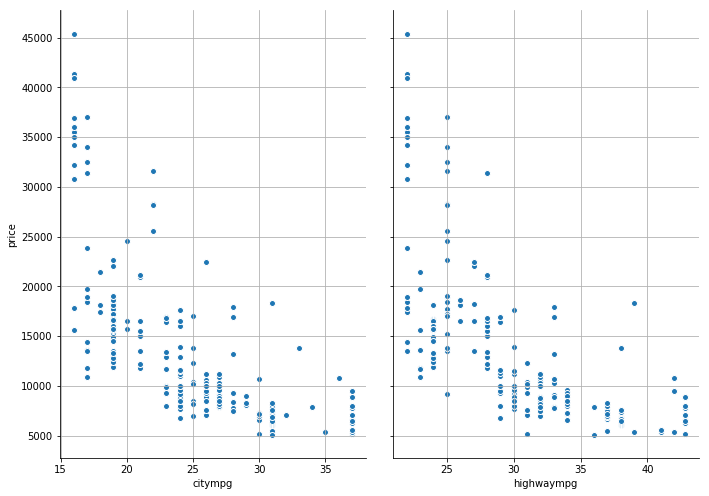

In [694]:
# Visualise the relationship between the X features and the response using scatterplots
sns.pairplot(car_price_num, x_vars=['citympg','highwaympg'], y_vars='price',size=7, aspect=0.7, kind='scatter')

**Conclusion from numeric attributes**

    Positively related to price (X) -  'wheelbase', 'carlength', 'carwidth' , 'curbweight','enginesize','boreratio' 
    and 'horsepower' 
    Negetively related to price (X) -  'citympg' and 'highwaympg' 

    From the visualization we can infer follwing variables bears little/no relationship with price.
    Dropping the variables - ['stroke' , 'compressionratio' & 'peakrpm']

In [695]:
car_price_num.drop(['stroke' , 'compressionratio','peakrpm'], axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C>  Creating new KPI - 

    1. Car_Dimension = (carlength * carwidth * 'carheight' )
    2. highwaytocitympg = highwaympg/citympg
    
    Dropping original variables - 'carlength', 'carheight' , 'carwidth', 'highwaympg' and 'citympg'

In [696]:
car_price_num['Car_Dimension'] = car_price_num['carlength']*car_price_num['carwidth']*car_price_num['carheight']

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [697]:
car_price_num['highwaytocitympg'] = car_price_num['highwaympg']/car_price_num['citympg']

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [698]:
car_price_num.drop(['carlength', 'carwidth', 'carheight','highwaympg','citympg'], axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Working with Y variable - price

    The dependent variable (price) seems to be left skewed.
    Taking log of (price) makes the distribution more normal.

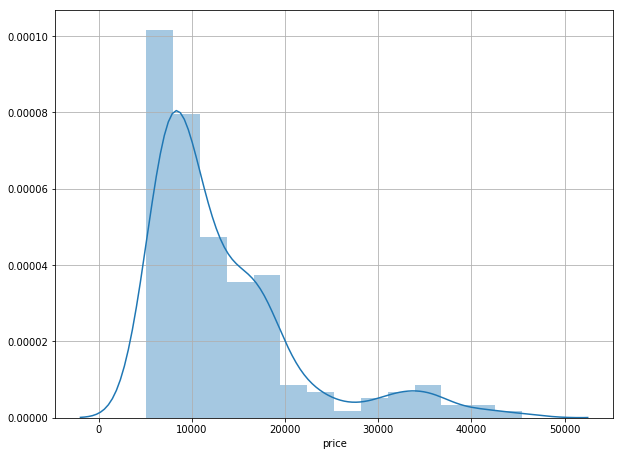

In [699]:
sns.distplot(car_price_num.price)

In [700]:
car_price_num['price'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
20%       7385.800000
30%       8022.000000
40%       9036.600000
50%      10295.000000
60%      12515.600000
70%      15458.000000
80%      17493.800000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64

In [701]:
car_price_num["ln_price"]= np.log(car_price_num["price"]+1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


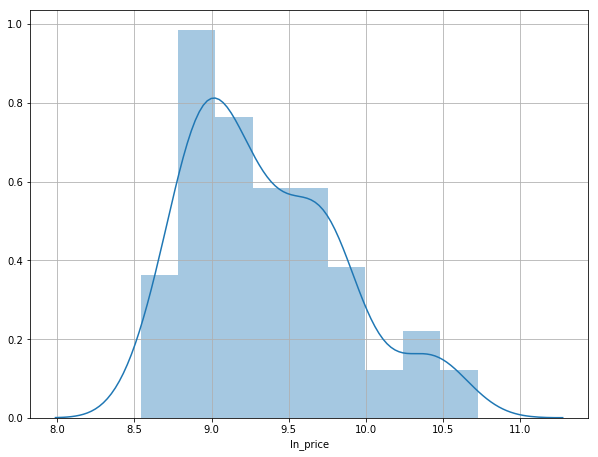

In [702]:
sns.distplot(car_price_num.ln_price)

In [703]:
car_price_num['ln_price'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    205.000000
mean       9.354776
std        0.503765
min        8.540714
10%        8.803573
20%        8.907447
30%        8.990065
40%        9.109118
50%        9.239511
60%        9.434784
70%        9.645924
80%        9.769646
90%       10.024105
max       10.723289
Name: ln_price, dtype: float64

In [704]:
#dropping price variable
car_price_num.drop('price', axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Rescaling the Numerical Features

In [705]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car_price_num = car_price_num.apply(normalize)

In [706]:
car_price_num.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,Car_Dimension,highwaytocitympg,ln_price
0,-0.335953,0.002141,0.046622,0.100174,0.067677,-0.309006,0.072538,0.071188
1,-0.335953,0.002141,0.046622,0.100174,0.067677,-0.309006,0.072538,0.163294
2,-0.248792,0.173801,0.244464,-0.464111,0.429630,-0.106503,0.200358,0.163294
3,0.063340,-0.129570,-0.142227,-0.099826,-0.008081,0.054025,0.017344,0.086380
4,0.039783,0.174425,0.100579,-0.099826,0.101347,0.060545,-0.025586,0.188940


In [707]:
car_price_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
wheelbase           205 non-null float64
curbweight          205 non-null float64
enginesize          205 non-null float64
boreratio           205 non-null float64
horsepower          205 non-null float64
Car_Dimension       205 non-null float64
highwaytocitympg    205 non-null float64
ln_price            205 non-null float64
dtypes: float64(8)
memory usage: 12.9 KB


### 2. Working with categorical features

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

Categorical features in our dataset -

- **Ordered categories:** symboling (already encoded with sensible numeric values), cylindernumber and doornumber(needs to be encoded to numeric values)
- **Unordered categories:** CarName ,fueltype ,aspiration ,carbody ,drivewheel ,enginelocation ,enginetype ,fuelsystem  (needs dummy encoding)

In [708]:
car_price_cat = car_price[cat_list]

In [709]:
car_price_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### **Ordered categories**

#### Number of Cylinders

The number of cylinders of a car is related to how the engine works.
In this dataset we have cylinders in the range from 2 to 6, 8 and 12.

    A. Transforming cylindernumber to sensible numeric values.

In [710]:
car_price_cat['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [711]:
def cylindernumber(car_price):
    if ((car_price.cylindernumber == 'two')):
        return 2
    elif ((car_price.cylindernumber == 'three')):
        return 3
    elif ((car_price.cylindernumber == 'four')):
        return 4
    elif ((car_price.cylindernumber == 'five')):
        return 5
    elif ((car_price.cylindernumber == 'six')):
        return 6
    elif ((car_price.cylindernumber == 'eight')):
        return 8
    elif ((car_price.cylindernumber == 'twelve')):
        return 12

car_price_cat['CylinderNo'] = car_price_cat.apply(cylindernumber, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [712]:
car_price_cat['CylinderNo'] = car_price_cat['CylinderNo'].astype('int64')
car_price_cat.drop('cylindernumber', axis=1,inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [713]:
car_price_cat['CylinderNo'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

    B. Observations of relationship of cylindernumber with price -
    
      From the counts of each value we can see that four cylinder has highest number.
      
      Though the price is not exactly linear with increase in cylinder number;
      but there is a significant increase of price from 4 to 8 cylinders

In [714]:
car_price.groupby('cylindernumber').price.mean().sort_values(ascending=False)

cylindernumber
eight     37400.100000
twelve    36000.000000
six       23671.833333
five      21630.469727
two       13020.000000
four      10285.754717
three      5151.000000
Name: price, dtype: float64

In [715]:
car_price.groupby('cylindernumber').price.count().sort_values(ascending=False)

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: price, dtype: int64

**Number of Doors**

Observing the variable num of doors, we see it has exactly two levels: 2 and 4.

    A. Transforming doornumber to sensible numeric values -

In [716]:
car_price_cat['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [717]:
def doornumber(car_price):
    if ((car_price.doornumber == 'two')):
        return 2
    elif ((car_price.doornumber == 'four')):
        return 4

car_price_cat['DoorNo'] = car_price_cat.apply(doornumber, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [718]:
car_price_cat['DoorNo'] = car_price_cat['DoorNo'].astype('int64')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [719]:
car_price_cat.drop('doornumber', axis=1,inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [720]:
car_price_cat['DoorNo'].unique()

array([2, 4], dtype=int64)

    B. Observations of relationship of doornumber with price -

In [721]:
car_price.groupby('doornumber').price.mean().sort_values(ascending=False)

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

In [722]:
car_price.groupby('doornumber').price.count().sort_values(ascending=False)

doornumber
four    115
two      90
Name: price, dtype: int64

The mean of doornumber 2 and 4 seems to be close; we will do a hypothesis testing to test their independence -

    Null Hypothesis - H0: Mean log of price of 4 is equal to the mean log of price of 2
    Alternative Hypothesis - HA: Mean log of price of 4 is not equal to the mean log of price of 2

**Inference** We can not reject null hypothesis/accept alternative hypothesis since the p-value is quite high.

In [723]:
import scipy.stats as stat

s1 = car_price.price[car_price['doornumber'] == 'four']
s2 = car_price.price[car_price['doornumber'] == 'two']
stat.f_oneway(s1,s2)

F_onewayResult(statistic=0.20594600575940436, pvalue=0.6504483953298938)

**Symboling**

Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
    
    It has already been encoded with sensible numeric values.
    
    Observations of relationship of Symboling with price -
    
    a. There is not linear relationship symboling vs price;however there is a price significant difference 
    between symboling =1 and -1
    
    b. Also the count of high safety auto is much less than auto with low safety symboling; whixh is curious.

In [724]:
car_price_cat['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [725]:
car_price.groupby('symboling').price.mean().sort_values(ascending=False)

symboling
-1    17330.681818
 3    17221.296296
-2    15781.666667
 0    14366.965179
 2    10109.281250
 1    10037.907407
Name: price, dtype: float64

In [726]:
car_price.groupby('symboling').price.count().sort_values(ascending=False)

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: price, dtype: int64

### **Unordered categories**

** Company of Car**
    
    We have 22 different brands; after removing the mis spelled values.
    The car price changes significantly from volvo to toyota

Data purification:-

    CarName seems to have misspelled values -
        'maxda', 'mazda' are same (mis-spelled)
        'Nissan', 'nissan' are same (mis-spelled)       
        'porsche','porcshce' are same (mis-spelled)
        'toyota', 'toyouta' are same (mis-spelled)
        'vokswagen', 'volkswagen', 'vw' are same (mis-spelled/initials)

In [727]:
car_price_cat['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [728]:
car_price_cat['CarName'] = car_price_cat['CarName'].replace('maxda', 'mazda', regex=True)
car_price_cat['CarName'] = car_price_cat['CarName'].replace('nissan', 'Nissan', regex=True)
car_price_cat['CarName'] = car_price_cat['CarName'].replace('porcshce', 'porsche', regex=True)
car_price_cat['CarName'] = car_price_cat['CarName'].replace('toyouta', 'toyota', regex=True)
car_price_cat['CarName'] = car_price_cat['CarName'].replace(['vokswagen','vw'], 'volkswagen', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [729]:
car_price_cat['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [730]:
#applying the same replacement to master dataset
car_price['CarName'] = car_price['CarName'].replace('maxda', 'mazda', regex=True)
car_price['CarName'] = car_price['CarName'].replace('nissan', 'Nissan', regex=True)
car_price['CarName'] = car_price['CarName'].replace('porcshce', 'porsche', regex=True)
car_price['CarName'] = car_price['CarName'].replace('toyouta', 'toyota', regex=True)
car_price['CarName'] = car_price['CarName'].replace(['vokswagen','vw'], 'volkswagen', regex=True)

In [731]:
car_price.groupby('CarName').price.mean().sort_values(ascending=False)

CarName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
Nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [732]:
car_price.groupby('CarName').price.count().sort_values(ascending=False)

CarName
toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: price, dtype: int64

    Checking if CarName does holds any significance -
    A very low p value signifies, we can not disregard CarName (brand value)

In [733]:
s1 = car_price.price[car_price['CarName'] =='alfa-romero']
s2 = car_price.price[car_price['CarName'] == 'audi' ]
s3 = car_price.price[car_price['CarName'] == 'bmw'] 
s4 = car_price.price[car_price['CarName'] == 'chevrolet'] 
s5 = car_price.price[car_price['CarName'] == 'dodge'] 
s6 = car_price.price[car_price['CarName'] == 'honda']
s7 = car_price.price[car_price['CarName'] == 'isuzu']
s8 = car_price.price[car_price['CarName'] == 'mazda'] 
s9 = car_price.price[car_price['CarName'] == 'buick'] 
s10 = car_price.price[car_price['CarName'] == 'mercury'] 
s11 = car_price.price[car_price['CarName'] == 'mitsubishi']
s12 = car_price.price[car_price['CarName'] == 'Nissan'] 
s13 = car_price.price[car_price['CarName'] == 'peugeot'] 
s14 = car_price.price[car_price['CarName'] == 'plymouth'] 
s15 = car_price.price[car_price['CarName'] == 'porsche'] 
s16 = car_price.price[car_price['CarName'] == 'renault'] 
s17 = car_price.price[car_price['CarName'] == 'saab']
s18 = car_price.price[car_price['CarName'] == 'subaru'] 
s19 = car_price.price[car_price['CarName'] == 'toyota'] 
s20 = car_price.price[car_price['CarName'] == 'volkswagen'] 
s21 = car_price.price[car_price['CarName'] == 'volvo']
s22 = car_price.price[car_price['CarName'] == 'jaguar'] 

stat.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22)

F_onewayResult(statistic=35.2876026298294, pvalue=3.646260081484874e-53)

**Car fuel type** 
    - has two values gas or diesel

**Observation** on fuel type analysis shows 'diesel' type car are priced higher than 'gas'

In [734]:
car_price_cat['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [735]:
car_price.groupby('fueltype').price.mean().sort_values(ascending=False)

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

In [736]:
car_price.groupby('fueltype').price.count().sort_values(ascending=False)

fueltype
gas       185
diesel     20
Name: price, dtype: int64

**Car aspiration** 
    - two types of as pirations used in car 'std' or 'turbo'

**Observation** on aspiration shows turbo type car are priced higher than std

In [737]:
car_price_cat['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [738]:
car_price.groupby('aspiration').price.mean().sort_values(ascending=False)

aspiration
turbo    16298.166676
std      12611.270833
Name: price, dtype: float64

In [739]:
car_price.groupby('aspiration').price.count().sort_values(ascending=False)

aspiration
std      168
turbo     37
Name: price, dtype: int64

**Drive wheels** 

    Decides traction of the cars, we see it has exactly three levels: 4wd, fwd and rwd.
    
    A. We can also see that the level 4wd has very few observations (9 out of 205, ~4%); 
    which can be because 'fwd', '4wd' seems so be same (mis-spelled).
    
    Therefore, we will only work with rwd and fwd.
    
    B. The mean price of 'rwd' car type is higher than 'fwd' type.

In [740]:
car_price_cat['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [741]:
car_price.groupby('drivewheel').price.count().sort_values(ascending=False)

drivewheel
fwd    120
rwd     76
4wd      9
Name: price, dtype: int64

In [742]:
car_price.groupby('drivewheel').price.mean().sort_values(ascending=False)

drivewheel
rwd    19910.809211
4wd    11087.463000
fwd     9239.308333
Name: price, dtype: float64

In [743]:
car_price_cat['drivewheel'] = car_price_cat['drivewheel'].replace('4wd', 'fwd', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [744]:
car_price_cat['drivewheel'].unique()

array(['rwd', 'fwd'], dtype=object)

**Location of car engine**
  
    We have two values 'front', 'rear'.
    Car with enginelocation 'rear' is significantly higher than 'front'  

In [745]:
car_price.groupby('enginelocation').price.mean().sort_values(ascending=False)

enginelocation
rear     34528.000000
front    12961.097361
Name: price, dtype: float64

In [746]:
car_price_cat['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

**Engine Type**

    The engine type of a vehicle states how the engine is assembled. 
    In this dataset we have seven engine types:-
    
        dohc (Dual OverHead Cam)
        dohcv (Dual OverHead Cam and Valve)
        l (L engine)
        ohc (OverHead Cam)
        ohcf (OverHead Cam and Valve F engine)
        ohcv (OverHead Cam and Valve)
        rotor (Rotary engine)
    
    The price seems to vary significantly over engine type; ohc engine type having highest observations (~72%)
    and lowest mean. Engine type ohcv is priced higher than ohcf.

In [747]:
car_price_cat['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [748]:
car_price.groupby('enginetype').price.mean().sort_values(ascending=False)

enginetype
dohcv    31400.500000
ohcv     25098.384615
dohc     18116.416667
l        14627.583333
ohcf     13738.600000
rotor    13020.000000
ohc      11574.048426
Name: price, dtype: float64

In [749]:
car_price.groupby('enginetype').price.count().sort_values(ascending=False)

enginetype
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: price, dtype: int64

**Car Fuel System**
    
    The fuel system is responsible for delivering fuel to the engine as needed.
    
    We have 8 different fuel system in our dataset.
    Fuel Type 'mpfi' is significantly higher priced as compared to '2bbl'

In [750]:
car_price_cat['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [751]:
car_price.groupby('fuelsystem').price.mean().sort_values(ascending=False)

fuelsystem
mpfi    17754.602840
idi     15838.150000
mfi     12964.000000
4bbl    12145.000000
spfi    11048.000000
spdi    10990.444444
1bbl     7555.545455
2bbl     7478.151515
Name: price, dtype: float64

In [752]:
car_price.groupby('fuelsystem').price.count().sort_values(ascending=False)

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: price, dtype: int64

**Carbody**

    In this dataset we have five body styles: convertible, hardtop, hatchback, sedan and wagon.
    
    A. The maximum car body stype is sedan.
    B. The mean price varies based on car body type; hardtop being the highest and hatchback being lowest.
        Among the high count items; sedan shows higher mean than hatchback.

In [753]:
car_price['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [754]:
car_price.groupby('carbody').price.mean().sort_values(ascending=False)

carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14344.270833
wagon          12371.960000
hatchback      10376.652386
Name: price, dtype: float64

In [755]:
car_price.groupby('carbody').price.count().sort_values(ascending=False)

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: price, dtype: int64

**Conclusion from Categorical Attributes**

Thus, the data clearly shows a few important aspects of the price of cars:-

    A. Car with safety feature tag '0' is priced relatively high than '1'.
    B. Brand value (Company name) has an influence in price coupled with other car attributes.
    C. Fuel type analysis shows 'diesel' type car are priced higher than 'gas'
    D. Car aspiration turbo type car are priced higher than standard.
    E. Sedan style car body shows higher mean than hatchback.
    F. The mean price of 'rwd' car type drive wheel is higher than 'fwd' type.
    G. Car with enginelocation 'rear' is significantly higher than 'front' 
    H. Engine type ohcv is priced higher than ohcf and ohc; also dohc is higher priced that ohc.
    I. 4 cylinders have lower price than 5 or 6 cylinders. Higher price are noticed for 8 or 12 cylinders, 
    but we have very minimal observations for the types.
    J. Lastly; we could not see any influence of the number of doors on the price of cars.

In [756]:
#dropping DoorNo since we could not see any influence of the number of doors on the price of cars
car_price_cat.drop('DoorNo',axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Creating Dummies for unordered categorical variables

In [757]:
# An utility function to create dummy variable
def create_dummies( car_price_cat, colname ):
    col_dummies = pd.get_dummies(car_price_cat[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    car_price_cat = pd.concat([car_price_cat, col_dummies], axis=1)
    car_price_cat.drop( colname, axis = 1, inplace = True )
    return car_price_cat

In [758]:
#for c_feature in categorical_features

for c_feature in ['CarName','fueltype' ,'aspiration' ,'carbody' ,'drivewheel' ,'enginelocation' ,'enginetype' ,'fuelsystem']:
    car_price_cat = create_dummies(car_price_cat , c_feature )

In [759]:
car_price_cat.head()

,symboling,CylinderNo,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,6,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Merging numeric and categorical attributes:-

In [760]:
car_price_new = pd.concat([car_price_num, car_price_cat], axis=1)

In [761]:
car_price_new.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,Car_Dimension,highwaytocitympg,ln_price,symboling,CylinderNo,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.335953,0.002141,0.046622,0.100174,0.067677,-0.309006,0.072538,0.071188,3,4,...,0,0,0,0,0,0,0,1,0,0
1,-0.335953,0.002141,0.046622,0.100174,0.067677,-0.309006,0.072538,0.163294,3,4,...,0,0,0,0,0,0,0,1,0,0
2,-0.248792,0.173801,0.244464,-0.464111,0.429630,-0.106503,0.200358,0.163294,1,6,...,0,1,0,0,0,0,0,1,0,0
3,0.063340,-0.129570,-0.142227,-0.099826,-0.008081,0.054025,0.017344,0.086380,2,4,...,0,0,0,0,0,0,0,1,0,0
4,0.039783,0.174425,0.100579,-0.099826,0.101347,0.060545,-0.025586,0.188940,2,5,...,0,0,0,0,0,0,0,1,0,0


In [762]:
car_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
wheelbase              205 non-null float64
curbweight             205 non-null float64
enginesize             205 non-null float64
boreratio              205 non-null float64
horsepower             205 non-null float64
Car_Dimension          205 non-null float64
highwaytocitympg       205 non-null float64
ln_price               205 non-null float64
symboling              205 non-null int64
CylinderNo             205 non-null int64
CarName_alfa-romero    205 non-null uint8
CarName_audi           205 non-null uint8
CarName_bmw            205 non-null uint8
CarName_buick          205 non-null uint8
CarName_chevrolet      205 non-null uint8
CarName_dodge          205 non-null uint8
CarName_honda          205 non-null uint8
CarName_isuzu          205 non-null uint8
CarName_jaguar         205 non-null uint8
CarName_mazda          205 non-null uint8
CarName_mercury        205 non-null uin

### Finding out co-relation among attributes

**Observations**

    wheelbase is highly co-related to Car_Dimension.
    curbweight is highly co-related to enginesize and  Car_Dimension.
    enginesize is highly co-related to curbweight and horsepower.
    Car Company peugeot uses enginetype I (L engine), hence correlated
    Car company subaru uses enginetype 'ohcf',  hence correlated
    fuelsystem '4bbl' uses enginetype 'rotor'   hence correlated
    highwaympg and citympg - correlated positively

In [763]:
# correlation matrix (ranges from 1 to -1)
car_price_corr=car_price_new.corr()

In [764]:
car_price_corr.to_csv('car_price_corr.csv')

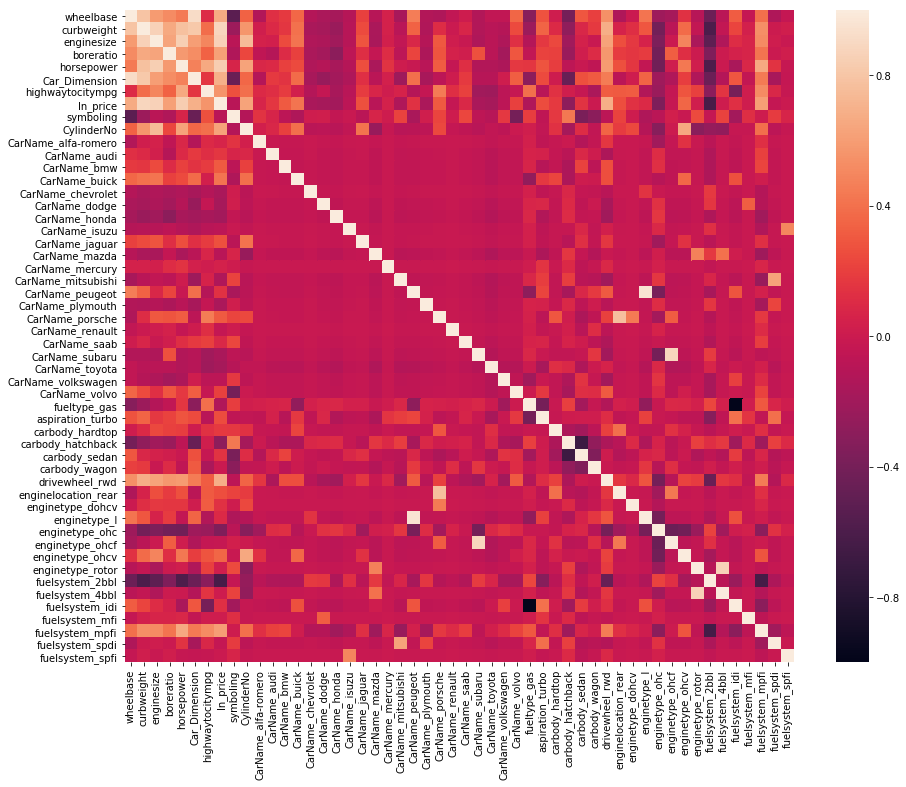

In [765]:
plt.rcParams['figure.figsize'] = 15, 12
sns.heatmap(car_price_new.corr())

## Building a linear regression model

In [766]:
import statsmodels.api as sm

In [767]:
feature_columns = car_price_new.columns.difference( ['ln_price'] )
feature_columns

Index(['CarName_alfa-romero', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'Car_Dimension', 'CylinderNo', 'aspiration_turbo', 'boreratio',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'curbweight', 'drivewheel_rwd', 'enginelocation_rear',
       'enginesize', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'fueltype_gas', 'highwaytocitympg', 'horsepower',
       'symboli

In [768]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_price_new[feature_columns],
                                                  car_price_new['ln_price'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

### MODEL 1

In [769]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [770]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     56.31
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.39e-52
Time:                        22:59:15   Log-Likelihood:                 239.66
No. Observations:                 143   AIC:                            -385.3
Df Residuals:                      96   BIC:                            -246.1
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0177    

In [771]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:' , metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:' , metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:' , np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.04300348530191632
MSE: 0.0028982578546735524
RMSE: 0.05383547022803416


    Model Conclusion - The model is having high R-SQUARE but the because of high number of attributes, 
    it is very complex to define.

### Feature Selection using - RFE

In [772]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [773]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(train_X, train_y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False  True  True False False False False  True False False
 False False False  True False False False False False False False False
 False False  True  True  True  True  True False  True  True False False
 False False False False False False False False False False False  True
  True  True False  True]
[38 16  2  1  1 14  9 31 23  1 17 11 10 25  8  1 20  7  4 12 30 33  6 22
 21 34  1  1  1  1  1 36  1  1 35  5 26  3 27 18 32 19 24 13 37 15 28  1
  1  1 29  1]


In [774]:
col = train_X.columns[rfe.support_]

In [775]:
col

Index(['CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'CarName_porsche',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'curbweight', 'enginelocation_rear', 'enginesize',
       'fueltype_gas', 'highwaytocitympg', 'horsepower', 'wheelbase'],
      dtype='object')

### MODEL 2 

### Building model 2 using the features selected from RFE

In [776]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = train_X[col]

In [777]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [778]:
lm2 = sm.OLS(train_y,X_train_rfe).fit()   # Running the linear model

In [779]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.12e-70
Time:                        22:59:24   Log-Likelihood:                 202.60
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     127   BIC:                            -325.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2177    

### Feature Reduction using - VIF

In [780]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [781]:
features = "+".join(car_price_new[col])

In [782]:
features

'CarName_bmw+CarName_buick+CarName_jaguar+CarName_porsche+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+curbweight+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [783]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+CarName_porsche+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+curbweight+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [784]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [785]:
vif.round(1)

,VIF Factor,features
0,67.7,Intercept
1,1.3,CarName_bmw
2,1.5,CarName_buick
3,1.2,CarName_jaguar
4,3.1,CarName_porsche
5,2.5,carbody_hardtop
6,10.1,carbody_hatchback
7,11.8,carbody_sedan
8,5.7,carbody_wagon
9,13.5,curbweight


### MODEL 3

    We know that curbweight and enginesize are correlated; lets drop 'curbweight'

In [786]:
col2 = X.columns.difference( ['curbweight','Intercept'] )

In [787]:
features2 = "+".join(car_price_new[col2])

In [788]:
features2

'CarName_bmw+CarName_buick+CarName_jaguar+CarName_porsche+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [789]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+CarName_porsche+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [790]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [791]:
vif.round(1)

,VIF Factor,features
0,58.6,Intercept
1,1.2,CarName_bmw
2,1.5,CarName_buick
3,1.2,CarName_jaguar
4,3.1,CarName_porsche
5,2.3,carbody_hardtop
6,9.7,carbody_hatchback
7,11.2,carbody_sedan
8,5.7,carbody_wagon
9,2.9,enginelocation_rear


In [792]:
X_train_rfe2 = train_X[col2]

In [793]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [794]:
lm2 = sm.OLS(train_y,X_train_rfe).fit()   # Running the linear model

In [795]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.12e-70
Time:                        22:59:33   Log-Likelihood:                 202.60
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     127   BIC:                            -325.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2177    

### MODEL4

 dropping CarName_porsche since the p value > 0.1

In [796]:
col3 = X.columns.difference( ['CarName_porsche','Intercept'] )

In [797]:
features3 = "+".join(car_price_new[col3])

In [798]:
features3

'CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [799]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+enginesize+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [800]:
vif = pd.DataFrame()

In [801]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [802]:
vif["features"] = X.columns

In [803]:
vif.round(1)

,VIF Factor,features
0,58.6,Intercept
1,1.2,CarName_bmw
2,1.5,CarName_buick
3,1.2,CarName_jaguar
4,2.3,carbody_hardtop
5,9.6,carbody_hatchback
6,11.1,carbody_sedan
7,5.6,carbody_wagon
8,1.6,enginelocation_rear
9,6.5,enginesize


In [804]:
X_train_rfe4 = train_X[col3]

In [805]:
X_train_rfe4 = sm.add_constant(X_train_rfe4)

In [806]:
lm4 = sm.OLS(train_y,X_train_rfe4).fit()   # Running the linear model

In [807]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.56e-67
Time:                        22:59:43   Log-Likelihood:                 190.97
No. Observations:                 143   AIC:                            -353.9
Df Residuals:                     129   BIC:                            -312.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2853    

### MODEL5

    enginesize is showing high p value; dropping the same

In [808]:
col5 = X.columns.difference( ['enginesize','Intercept'] )

In [809]:
features5 = "+".join(car_price_new[col5])

In [810]:
features5

'CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [811]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_sedan+carbody_wagon+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [812]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [813]:
vif.round(1)

,VIF Factor,features
0,54.7,Intercept
1,1.1,CarName_bmw
2,1.4,CarName_buick
3,1.1,CarName_jaguar
4,2.3,carbody_hardtop
5,9.3,carbody_hatchback
6,10.8,carbody_sedan
7,5.5,carbody_wagon
8,1.6,enginelocation_rear
9,1.6,fueltype_gas


In [814]:
X_train_rfe5 = train_X[col5]

In [815]:
X_train_rfe5 = sm.add_constant(X_train_rfe5)

In [816]:
lm5 = sm.OLS(train_y,X_train_rfe5).fit() 

In [817]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.34e-68
Time:                        22:59:50   Log-Likelihood:                 190.92
No. Observations:                 143   AIC:                            -355.8
Df Residuals:                     130   BIC:                            -317.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2827    

### MODEL 6

    dropping carbody_sedan because of high VIF value

In [818]:
col6 = X.columns.difference( ['carbody_sedan','Intercept'] )

In [819]:
features6 = "+".join(car_price_new[col6])

In [820]:
features6

'CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_wagon+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [821]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+carbody_wagon+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [822]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [823]:
vif.round(1)

,VIF Factor,features
0,16.7,Intercept
1,1.1,CarName_bmw
2,1.3,CarName_buick
3,1.1,CarName_jaguar
4,1.3,carbody_hardtop
5,1.4,carbody_hatchback
6,1.2,carbody_wagon
7,1.5,enginelocation_rear
8,1.6,fueltype_gas
9,2.2,highwaytocitympg


In [824]:
X_train_rfe6 = train_X[col6]

In [825]:
X_train_rfe6 = sm.add_constant(X_train_rfe6)

In [826]:
lm6 = sm.OLS(train_y,X_train_rfe6).fit()   # Running the linear model

In [827]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.65e-65
Time:                        22:59:58   Log-Likelihood:                 180.30
No. Observations:                 143   AIC:                            -336.6
Df Residuals:                     131   BIC:                            -301.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1405    

### MODEL 7

    dropping 'carbody_wagon' because of high p-value

In [828]:
#dropping carbody_wagon because of high p value
col7 = X.columns.difference( ['carbody_wagon','Intercept'] )

In [829]:
features7 = "+".join(car_price_new[col7])

In [830]:
features7

'CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [831]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+carbody_hardtop+carbody_hatchback+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [832]:
vif = pd.DataFrame()

In [833]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [834]:
vif["features"] = X.columns

In [835]:
vif.round(1)

,VIF Factor,features
0,16.7,Intercept
1,1.1,CarName_bmw
2,1.3,CarName_buick
3,1.1,CarName_jaguar
4,1.3,carbody_hardtop
5,1.3,carbody_hatchback
6,1.5,enginelocation_rear
7,1.5,fueltype_gas
8,2.2,highwaytocitympg
9,2.7,horsepower


In [836]:
X_train_rfe7 = train_X[col7]

In [837]:
X_train_rfe7 = sm.add_constant(X_train_rfe7)

In [838]:
lm7 = sm.OLS(train_y,X_train_rfe7).fit()   # Running the linear model

In [839]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.40e-66
Time:                        23:00:09   Log-Likelihood:                 179.65
No. Observations:                 143   AIC:                            -337.3
Df Residuals:                     132   BIC:                            -304.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1417    

### MODEL 8

    dropping carbody_hardtop since the p value > 0.1

In [840]:
col8 = X.columns.difference( ['carbody_hardtop','Intercept'] )

In [841]:
features8 = "+".join(car_price_new[col8])

In [842]:
features8

'CarName_bmw+CarName_buick+CarName_jaguar+carbody_hatchback+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase'

In [843]:
y, X = dmatrices('ln_price~CarName_bmw+CarName_buick+CarName_jaguar+carbody_hatchback+enginelocation_rear+fueltype_gas+highwaytocitympg+horsepower+wheelbase', car_price_new, return_type='dataframe')

In [844]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features8"] = X.columns

In [845]:
vif.round(1)

,VIF Factor,features8
0,16.7,Intercept
1,1.1,CarName_bmw
2,1.3,CarName_buick
3,1.1,CarName_jaguar
4,1.3,carbody_hatchback
5,1.3,enginelocation_rear
6,1.5,fueltype_gas
7,2.2,highwaytocitympg
8,2.7,horsepower
9,2.2,wheelbase


In [846]:
X_train_rfe8 = train_X[col8]

In [847]:
X_train_rfe8 = sm.add_constant(X_train_rfe8)

In [848]:
lm8 = sm.OLS(train_y,X_train_rfe8).fit()   # Running the linear model

In [849]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.35e-67
Time:                        23:00:15   Log-Likelihood:                 178.71
No. Observations:                 143   AIC:                            -337.4
Df Residuals:                     133   BIC:                            -307.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1415    

    The model 8 looks good with 9 attribue, high r-square value and low error.

## Making Predictions

In [850]:
mod_col = X_train_rfe8.columns
X_test_rfe = test_X[mod_col]

In [851]:
X_test_rfe = sm.add_constant(X_test_rfe)
y_pred = lm8.predict(X_test_rfe)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.06205435055908845
MSE: 0.005974964743628254
RMSE: 0.07729789611385457


### MODEL 9 - Refining the Final model

    Reducing the variables -
    CarName_jaguar -   since it has very few observations
    carbody_hatchback - to improve the p-value
    
    Even after reducing to 7 variables; we are able to get very good r-square and low error.
    The Model 9 is explaining 90% variance with 7 variance

In [852]:
col9 = ['CarName_bmw','CarName_buick','enginelocation_rear', 'fueltype_gas', 'highwaytocitympg', 'horsepower', 'wheelbase']

In [853]:
X_train_rfe9 = train_X[col9]

In [854]:
X_train_rfe9 = sm.add_constant(X_train_rfe9)

In [855]:
lm9 = sm.OLS(train_y,X_train_rfe9).fit()   # Running the linear model

In [856]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.13e-67
Time:                        23:00:22   Log-Likelihood:                 174.45
No. Observations:                 143   AIC:                            -332.9
Df Residuals:                     135   BIC:                            -309.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1372    

### Making Predictions

In [857]:
mod_col = X_train_rfe9.columns
X_test_rfe = test_X[mod_col]

In [858]:
X_test_rfe = sm.add_constant(X_test_rfe)
y_pred = lm9.predict(X_test_rfe)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.06398142208849883
MSE: 0.006174534333402739
RMSE: 0.07857820520604132


## Model Evaluation

    The model looks good on evaluations:-
    It is able to predict the high and lows in curve.
    The predicted graph syncs quite well with actual
    Low error value.
    Residuals seems to be evenly distributed over regression line

In [859]:
# Now let's check how well our model is able to make predictions.
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Auto Price')

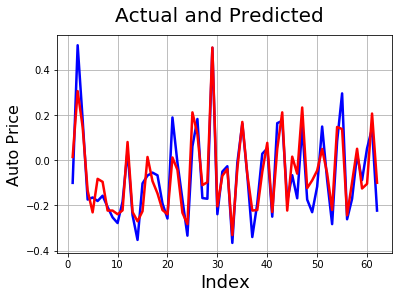

In [860]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,test_y, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Auto Price', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

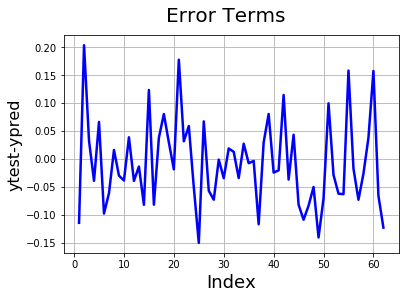

In [861]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,test_y-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

Text(0,0.5,'y_pred')

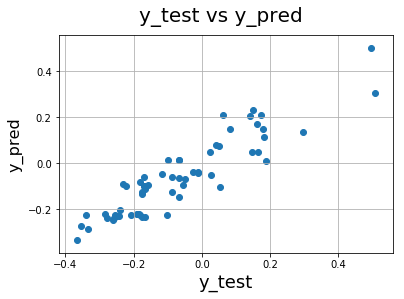

In [862]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(test_y,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Text(0,0.5,'Index')

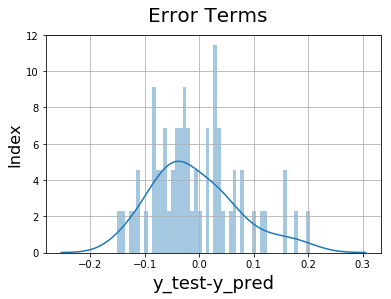

In [863]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((test_y-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16) 

In [864]:
residuals = test_y - y_pred

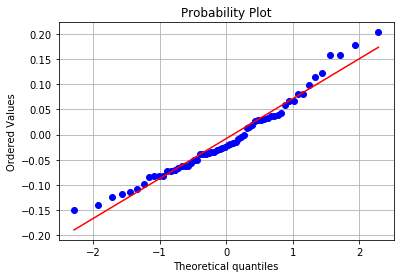

In [865]:
from scipy import stats
import pylab
stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

### Final Equation -

    Y (PRICE) = 0.1562*CarName_bmw + 0.1232*CarName_buick +  0.2357*enginelocation_rear + 
    (-0.1653)*fueltype_gas + 0.3443*highwaytocitympg +  0.3847*horsepower + 0.2446*wheelbase +  0.1372

### RECOMMENDATIONS:-

    1. Brand value does play a positive role in price, so Geely Auto must invest in marketing their project 
    to improve their brand names before launching their motor.
    
    2. Cars having Engine in rear location has a postive impact to the price.
    
    3. Cars are high priced and prefered when they are diesel type (fule type gas has negetive impact to the price).
    
    4. Highway to city milage ratio should be high. 
        Also; milage is negetively related to price, implying higher the milage -lower is the price. 
    
    5. Higher horsepower leads to higher price.
    
    6. Larger wheel base adds positive score to price.
    
    7. Also; carbody plays a role in price to some extent.
        hardtop, hatchback, wagon, sedan car body are lower priced.

    ***************************************** THANK YOU *****************************************************